In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data=pd.read_csv("/content/drive/MyDrive/data2.csv")
data

,X,Y
0,0.987988,5.098368
1,0.719720,2.516654
2,-0.403403,0.337961
3,0.107107,0.737320
4,0.345345,-0.780955
...,...,...
995,0.671672,3.079356
996,-0.615616,0.027487
997,0.259259,1.068320
998,0.119119,0.245188


In [3]:
data.columns

Index(['X', 'Y'], dtype='object')

In [4]:
data['X']=(data['X']-np.mean(data['X']))/np.std(data['X'])

In [5]:
data.head(5)

,X,Y
0,1.709535,5.098368
1,1.245345,2.516654
2,-0.698017,0.337961
3,0.185330,0.737320
4,0.597558,-0.780955


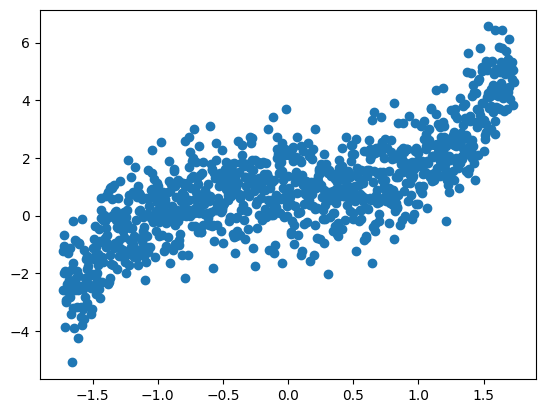

In [6]:
plt.scatter(data['X'],data['Y'])

In [7]:
data=data.sample(frac=1,random_state=42).reset_index(drop=True)

In [8]:
data.head()

,X,Y
0,-1.473976,-1.070249
1,-1.477440,-2.724890
2,0.275396,2.149207
3,-1.068676,0.324686
4,-0.379319,1.525150


In [9]:
index = (int)(0.8 * len(data))
print(index)

800


In [10]:
data_training=data[:index]
data_test=data[index:]

In [11]:
data_training.head()

,X,Y
0,-1.473976,-1.070249
1,-1.477440,-2.724890
2,0.275396,2.149207
3,-1.068676,0.324686
4,-0.379319,1.525150


In [12]:
data_test.head()

,X,Y
800,1.165671,1.374630
801,1.030571,0.768013
802,0.840045,3.212694
803,-1.325020,-0.951182
804,0.670304,-0.545128


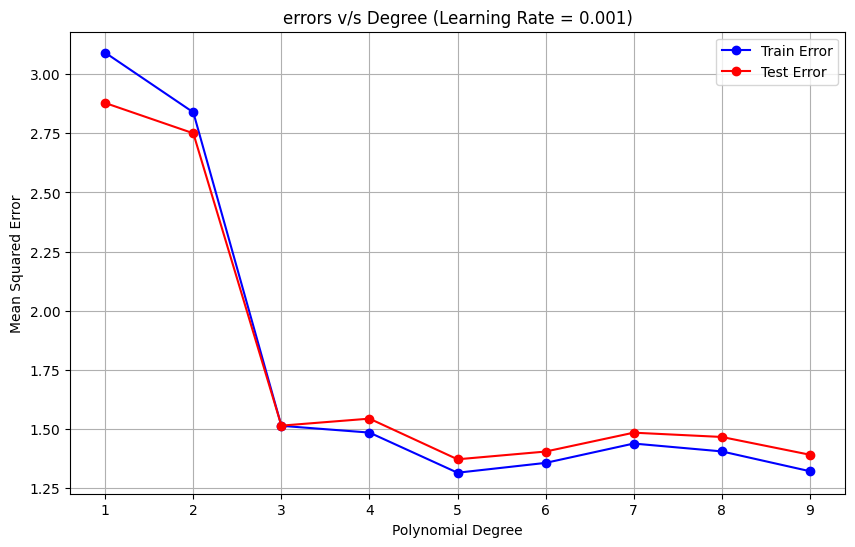

Best Theta for learning rate 0.001: [0.15317341 0.0750858  0.10554616 0.12931267 0.14369998 0.24930463]
Best degree for learning rate 0.001: 5


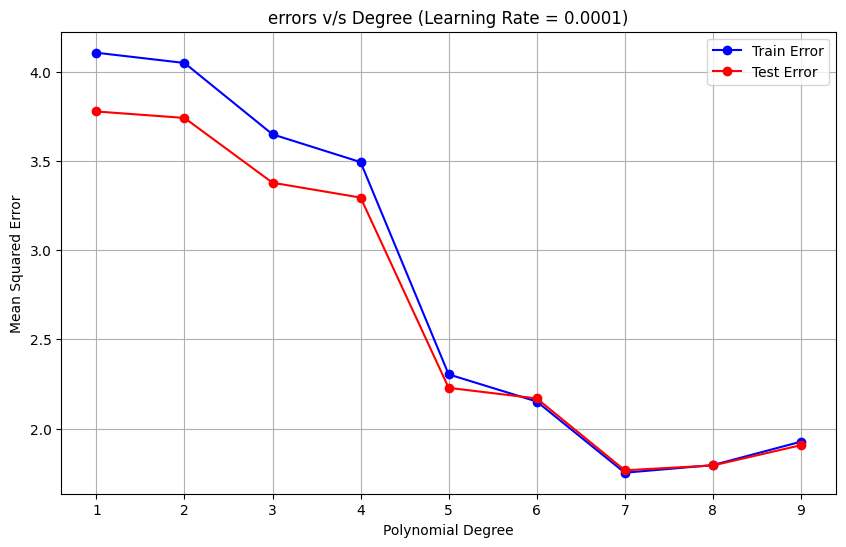

Best Theta for learning rate 0.0001: [0.15317341 0.0750858  0.10554616 0.12931267 0.14369998 0.24930463]
Best degree for learning rate 0.0001: 5


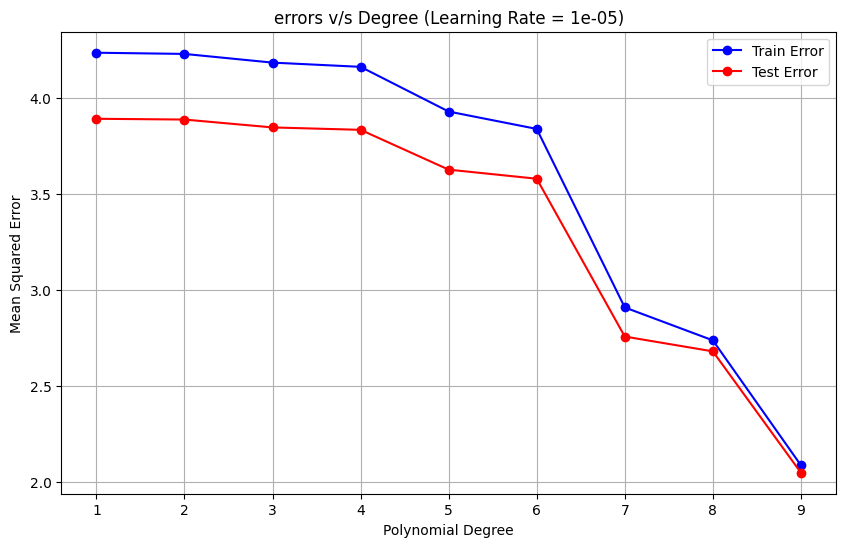

Best Theta for learning rate 1e-05: [0.15317341 0.0750858  0.10554616 0.12931267 0.14369998 0.24930463]
Best degree for learning rate 1e-05: 5


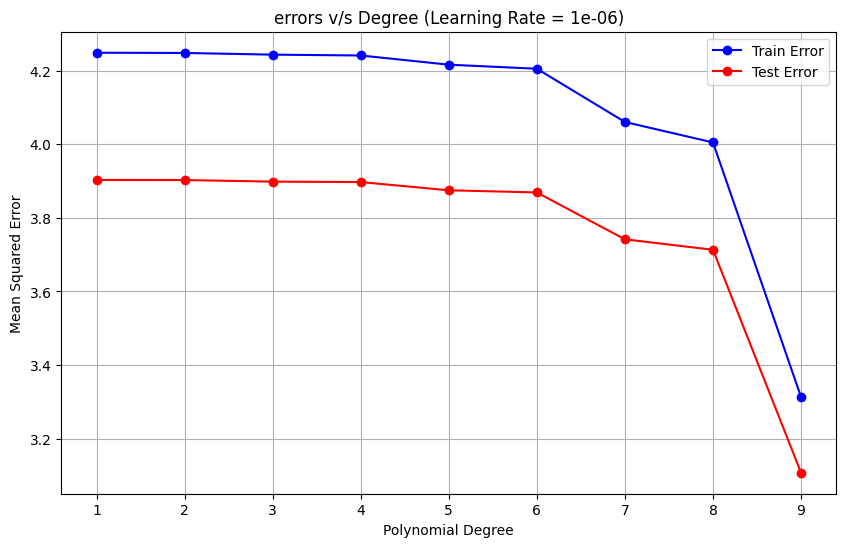

Best Theta for learning rate 1e-06: [0.15317341 0.0750858  0.10554616 0.12931267 0.14369998 0.24930463]
Best degree for learning rate 1e-06: 5


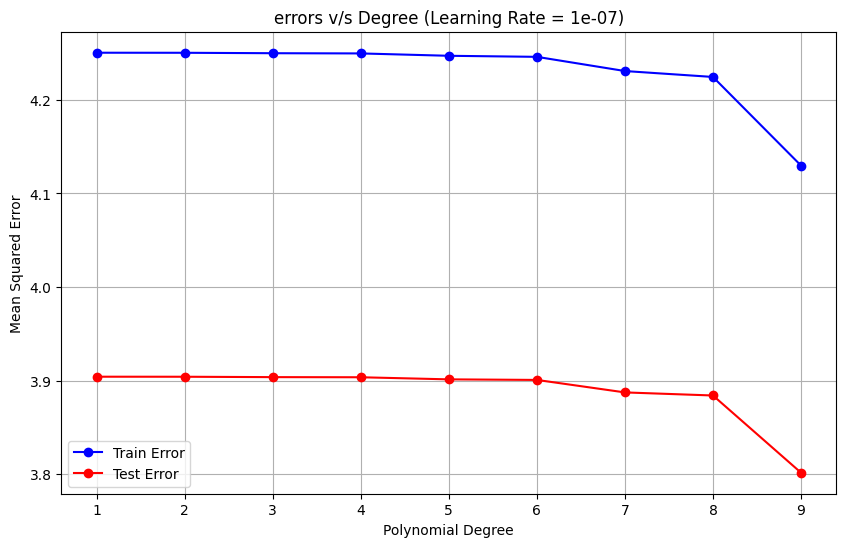

Best Theta for learning rate 1e-07: [0.15317341 0.0750858  0.10554616 0.12931267 0.14369998 0.24930463]
Best degree for learning rate 1e-07: 5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def polynomial_features(X, degree):
    return np.array([X**i for i in range(degree+1)]).T

def batch_gradient_descent(X, y,degree,  learning_rate, iterations):
    X_poly=polynomial_features(X,degree)
    m, n = X_poly.shape
    #weight = np.random.randn(n)
    weight = np.zeros(n)
    for _ in range(iterations):
        gradients = (1/(2*m)) * X_poly.T.dot(X_poly.dot(weight) - y)
        weight -= learning_rate * gradients

    return weight


def mean_squared_error(X, Y, theta, degree):
    Y=Y.reshape(-1,1)
    X=X.reshape(-1,1)
    X_poly = polynomial_features(X, degree)
    predictions = X_poly.dot(theta).reshape(-1,1)
    error = (predictions - Y).reshape(-1,1)
    mse = np.mean(error**2)
    return mse


X_train=np.array(data_training['X'])
X_test=np.array(data_test['X'])
Y_train=np.array(data_training['Y'])
Y_test=np.array(data_test['Y'])


learning_rates = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
degrees = range(1, 10)
min_test_e = 100000
theta_min_lr = None
for lr in learning_rates:
    train_errors = []
    test_errors = []

    for degree in degrees:
        theta = batch_gradient_descent(X_train, Y_train, degree, learning_rate=lr, iterations=500)


        train_error = mean_squared_error(X_train, Y_train, theta, degree)
        train_errors.append(train_error)

        test_error = mean_squared_error(X_test, Y_test, theta, degree)
        test_errors.append(test_error)

        # Track the minimum
        if test_error < min_test_e:
            theta_min_lr = theta
            min_test_e = test_error
            best_degree = degree

    # plot graph fr error
    plt.figure(figsize=(10, 6))
    plt.plot(degrees, train_errors, label='Train Error', marker='o', color='blue')
    plt.plot(degrees, test_errors, label='Test Error', marker='o', color='red')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Mean Squared Error')
    plt.title(f'errors v/s Degree (Learning Rate = {lr})')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Best Theta for learning rate {lr}: {theta_min_lr}")
    print(f"Best degree for learning rate {lr}: {best_degree}")


# print(degrees)
# print(train_errors)



The best degree is 5
error is 1.3712778450058516


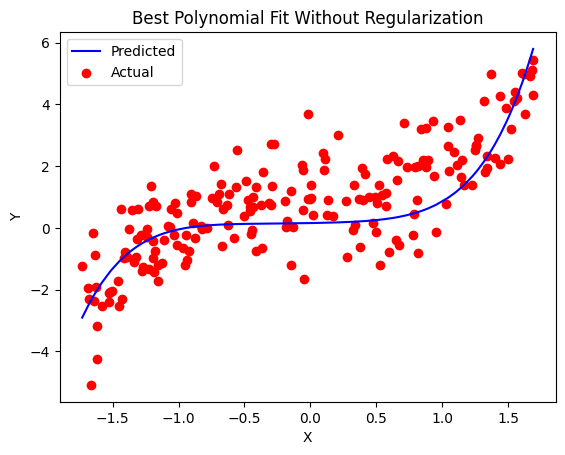

In [ ]:
Y_pred = np.dot(polynomial_features(data_test['X'], best_degree), theta_min_lr)
print(f"The best degree is {best_degree}")
print(f"error is {mean_squared_error(X_test,Y_test,theta_min_lr,best_degree)}")
plt.plot(np.sort(data_test['X']), Y_pred[np.argsort(data_test['X'])], label="Predicted", color="blue")

plt.scatter(data_test['X'], data_test['Y'], label="Actual", color="red")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title("Best Polynomial Fit Without Regularization")
plt.show()

In [13]:
data=data.sample(frac=1,random_state=42).reset_index(drop=True)
data_training_R=data[:600]
data_val_R=data[600:800]
data_test_R=data[800:]
X_train=np.array(data_training_R['X'])
X_test=np.array(data_test_R['X'])
Y_train=np.array(data_training_R['Y'])
Y_test=np.array(data_test_R['Y'])
X_val=np.array(data_val_R['X'])
Y_val=np.array(data_val_R['Y'])

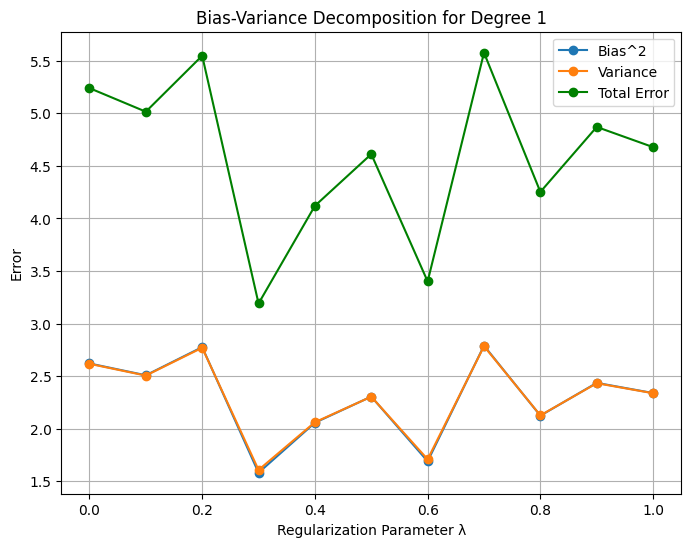

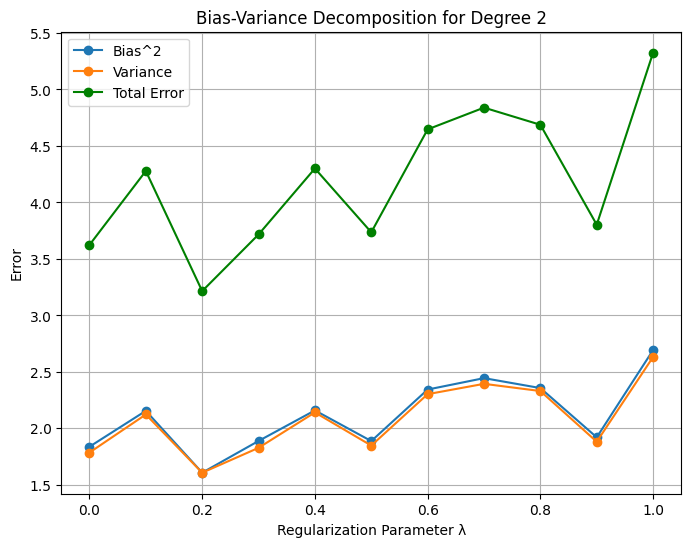

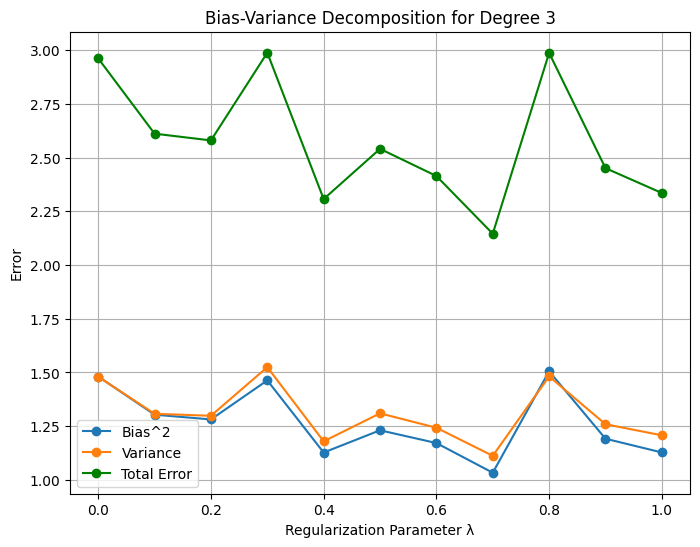

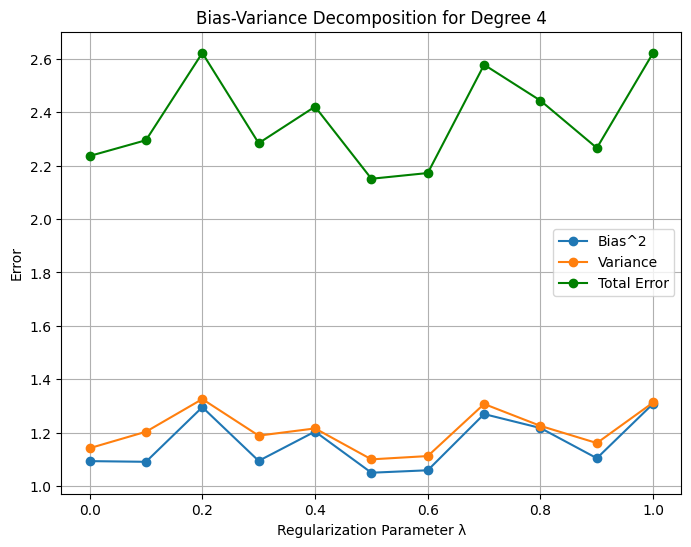

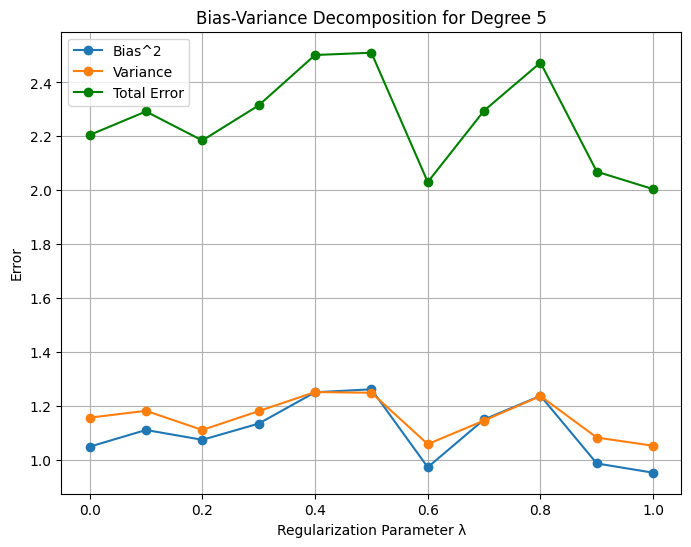

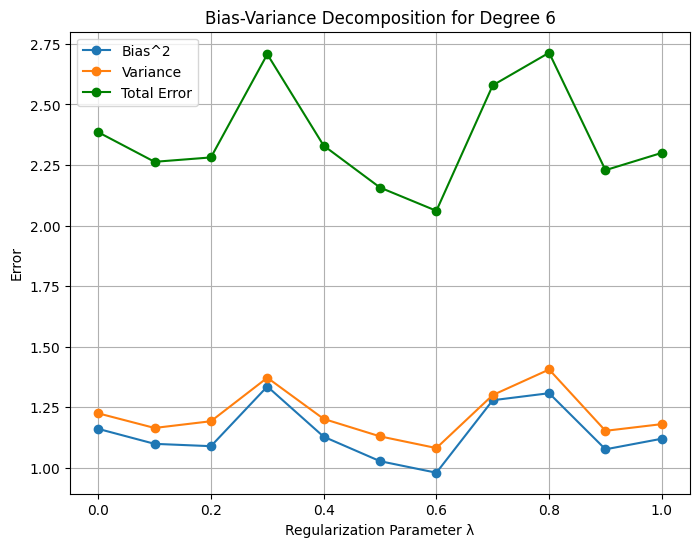

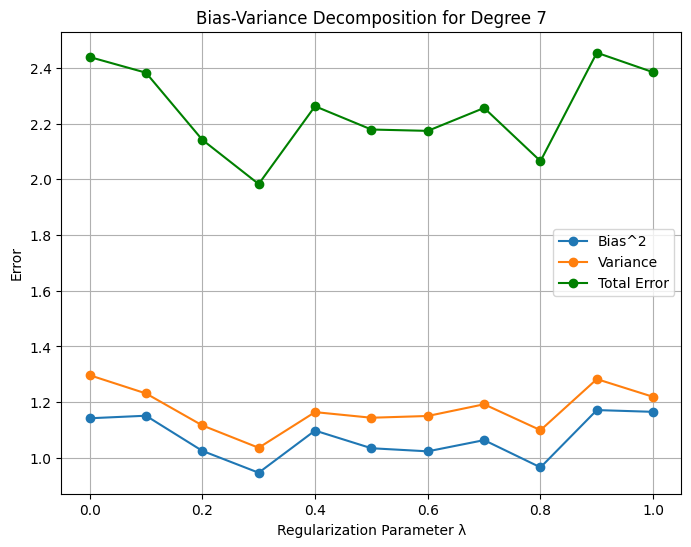

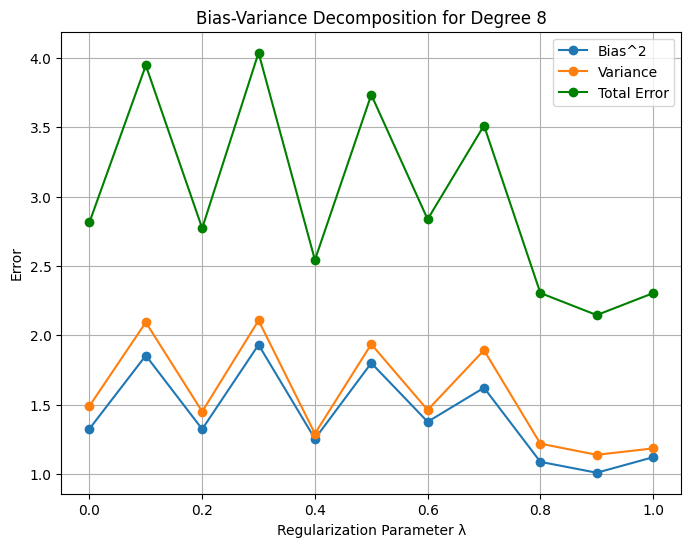

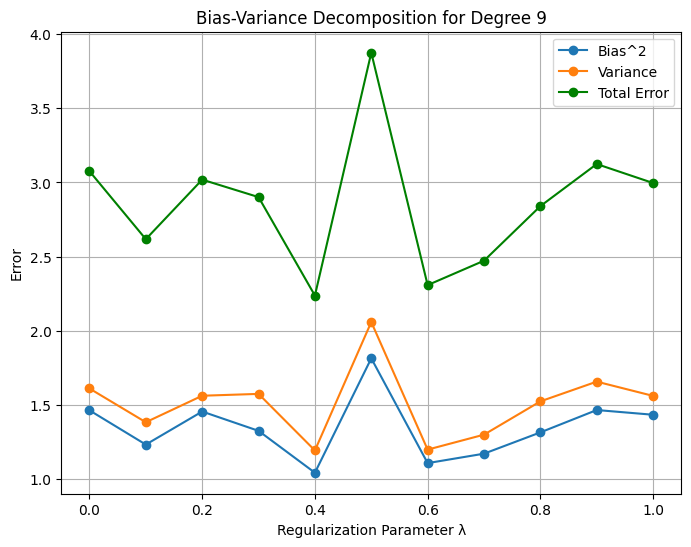


Table for Polynomial Degree 1:

    Lambda    Bias^2  Variance
0      0.0  2.621059  2.617678
1      0.1  2.508780  2.505764
2      0.2  2.776260  2.770486
3      0.3  1.582260  1.608897
4      0.4  2.057528  2.062161
5      0.5  2.306195  2.305182
6      0.6  1.691039  1.709872
7      0.7  2.790341  2.784951
8      0.8  2.124668  2.127204
9      0.9  2.436473  2.433175
10     1.0  2.339725  2.338056



Table for Polynomial Degree 2:

    Lambda    Bias^2  Variance
0      0.0  1.837715  1.785947
1      0.1  2.155205  2.123060
2      0.2  1.607712  1.607543
3      0.3  1.888601  1.827898
4      0.4  2.159179  2.141268
5      0.5  1.887641  1.848025
6      0.6  2.343748  2.302939
7      0.7  2.444773  2.394376
8      0.8  2.356847  2.330561
9      0.9  1.920895  1.881915
10     1.0  2.693347  2.631810



Table for Polynomial Degree 3:

    Lambda    Bias^2  Variance
0      0.0  1.481089  1.480463
1      0.1  1.303567  1.307652
2      0.2  1.281407  1.298364
3      0.3  1.463168  1.52474

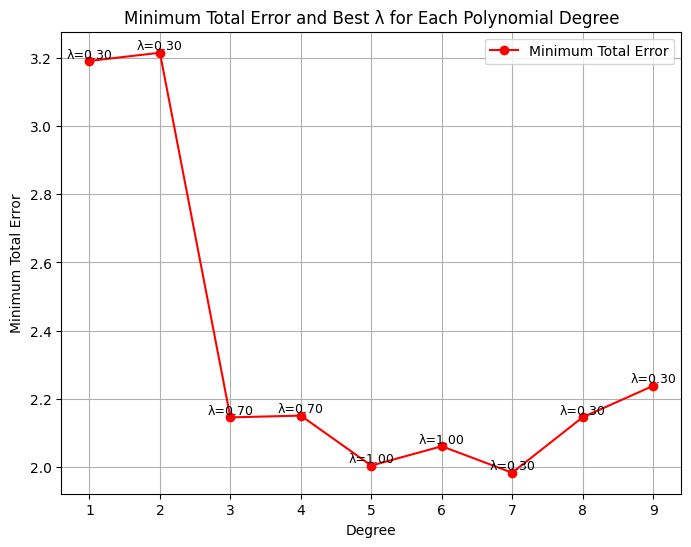

In [20]:
def polynomial_features(X, degree):
    return np.array([X**i for i in range(degree + 1)]).T


def batch_gradient_descent_ridge(X, Y, degree, learning_rate, iterations, lambda_reg):

    X_poly = polynomial_features(X, degree)
    theta = np.random.rand(X_poly.shape[1])
    # theta=np.zeros(X_poly.shape[1])
    Y=Y.reshape(-1,1)
    theta=theta.reshape(-1,1)
    m = len(Y)

    for _ in range(iterations):
        theta=theta.reshape(-1,1)
        # if degree==2:
        #   print(f"{degree}",X_poly[:1])
        #   print(theta)

        predictions = X_poly.dot(theta)

        predictions=predictions.reshape(-1,1)
        # if degree==2:
        #   print(predictions[:1])
        error = predictions - Y

        # if degree==1:
        #   print(theta)
        gradient =  (1/(2*m))*((X_poly.T.dot(error)) + (lambda_reg )* theta).reshape(-1,1)
        theta -= learning_rate * gradient


    return theta

def mean_squared_error(X, Y, theta, degree):
    X=X.reshape(-1,1)
    X_poly = polynomial_features(X, degree)
    Y=Y.reshape(-1,1)
    predictions = X_poly.dot(theta).reshape(-1,1)
    error = (predictions - Y).reshape(-1,1)
    mse = np.mean(error**2)
    return mse


def calculate_bias_variance_error(X_train, Y_train, X_val, Y_val, degree, lambda_reg):

    # print(lambda_reg)
    theta = batch_gradient_descent_ridge(X_train, Y_train, degree, learning_rate=0.001, iterations=500, lambda_reg=lambda_reg)

    train_error = mean_squared_error(X_train, Y_train, theta, degree)
    val_error = mean_squared_error(X_val, Y_val, theta, degree)
    bias = train_error
    variance = val_error
    total_error = bias + variance

    return theta ,bias, variance, total_error

degrees = range(1, 10)
lambdas = np.arange(0, 1.1, 0.1)
bias_values = {}
variance_values = {}
error_values = {}
degree_min_error=[]
best_lambda_for_degree = []
min_e_R=10000
# min_e_mse=10000

for degree in degrees:
    bias_values[degree] = []
    variance_values[degree] = []
    error_values[degree] = []
    min_error_degree=10000
    for lambda_reg in lambdas:
        theta, bias, variance, total_error = calculate_bias_variance_error(X_train, Y_train, X_val, Y_val, degree, lambda_reg)
        bias_values[degree].append(bias)
        variance_values[degree].append(variance)
        error_values[degree].append(total_error)
        # mse =mean_squared_error(X_val, Y_val, theta, degree)
        if total_error<min_e_R:
            min_e_R=total_error
            best_degree_R=degree
            best_theta_R=theta
            best_lambda=lambda_reg
        if total_error<min_error_degree:
            min_error_degree=total_error
    best_lambda_for_degree.append(best_lambda)

    degree_min_error.append(min_error_degree)
        # if mse<min_e_mse:
        #     min_e_mse=mse
        #     best_degree_mse=degree
        #     best_theta_mse=theta
        #     best_lambda_mse=lambda_reg




for degree in degrees:
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(lambdas, [b   for b in bias_values[degree]], label='Bias^2', marker='o')
    ax.plot(lambdas, variance_values[degree], label='Variance', marker='o')
    ax.plot(lambdas, error_values[degree], label='Total Error', color='green', marker='o')

    ax.set_xlabel('Regularization Parameter λ')
    ax.set_ylabel('Error')
    ax.set_title(f'Bias-Variance Decomposition for Degree {degree}')
    ax.legend()
    ax.grid(True)

    plt.show()
def plot_min_error_per_degree(degrees, degree_min_error, best_lambda_for_degree):
    plt.figure(figsize=(8, 6))
    plt.plot(degrees, degree_min_error, marker='o', color='red', label='Minimum Total Error')


    for i, degree in enumerate(degrees):
        plt.text(degree, degree_min_error[i], f"λ={best_lambda_for_degree[i]:.2f}", fontsize=9, ha='center', va='bottom')

    plt.xlabel('Degree')
    plt.ylabel('Minimum Total Error')
    plt.title('Minimum Total Error and Best λ for Each Polynomial Degree')
    plt.grid(True)
    plt.legend()
    plt.show()


def create_bias_variance_table(degrees, lambdas, bias_values, variance_values):
    # Create a table for each degree
    for degree in degrees:

        data = {
            'Lambda': lambdas,
            'Bias^2': bias_values[degree],
            'Variance': variance_values[degree]
        }
        #tabulate krne k liye
        df = pd.DataFrame(data)
        print(f"\nTable for Polynomial Degree {degree}:\n")
        print(df)
        print("\n" + "="*40 + "\n")

create_bias_variance_table(degrees, lambdas, bias_values, variance_values)
plot_min_error_per_degree(degrees, degree_min_error, best_lambda_for_degree)




In [21]:
print(f"best with var+bsq{best_theta_R}")
print(f"best with var+bsq{best_lambda}")

best with var+bsq[[ 0.79808857]
 [ 0.51277432]
 [-0.06617098]
 [-0.00871423]
 [ 0.32112232]
 [ 0.35580044]
 [-0.09400467]
 [-0.04925114]]
best with var+bsq0.30000000000000004


The best degree is 7
error is 1.0416891858845727


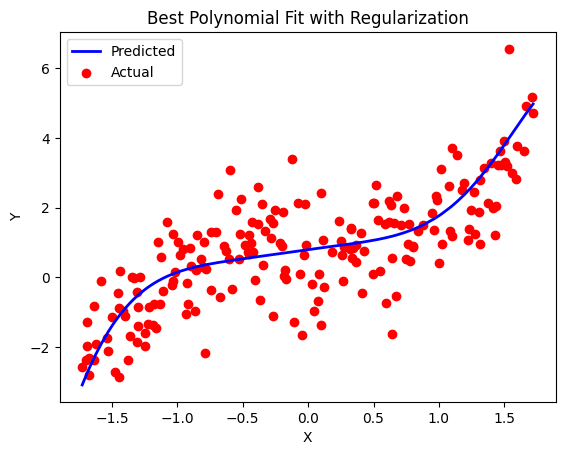

In [22]:
Y_pred = np.dot(polynomial_features(X_test, best_degree_R), best_theta_R)
#print(best_degree)
print(f"The best degree is {best_degree_R}")
print(f"error is {mean_squared_error(X_test,Y_test,best_theta_R,best_degree_R)}")
plt.plot(np.sort(X_test), Y_pred[np.argsort(X_test)], label="Predicted", color="blue", linewidth=2)
plt.scatter(X_test, Y_test, label="Actual", color="red")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title("Best Polynomial Fit with Regularization")
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D


def batch_gradient_descent_ridge(X, Y, degree, learning_rate, iterations, lambda_reg):
    X_poly = polynomial_features(X, degree)
    theta = np.random.rand(X_poly.shape[1]).reshape(-1,1)
    Y = Y.reshape(-1,1)
    m = len(Y)

    for _ in range(iterations):
        predictions = X_poly.dot(theta).reshape(-1,1)
        error = predictions - Y
        gradient = (1/m)*(X_poly.T.dot(error) + (lambda_reg) * theta).reshape(-1,1)
        theta -= learning_rate * gradient

    return theta


def mean_squared_error(X, Y, theta, degree):
    X=X.reshape(-1,1)
    Y=Y.reshape(-1,1)
    X_poly = polynomial_features(X, degree)
    predictions = X_poly.dot(theta).reshape(-1,1)
    error = (predictions - Y).reshape(-1,1)
    mse = np.mean(error**2)
    return mse

def calculate_mse(X_train, Y_train, X_test, Y_test, degree, learning_rate, lambda_reg):
    theta = batch_gradient_descent_ridge(X_train, Y_train, degree, learning_rate, iterations=500, lambda_reg=lambda_reg)
    test_error = mean_squared_error(X_test, Y_test, theta, degree)
    return test_error

# Defining ranges for hyperparameters
degrees = range(1, 10)
learning_rates = np.arange(1e-7, 1e-6, 1e-7)
lambdas = np.arange(0, 1, 0.1)
mse_values = np.zeros((len(degrees), len(learning_rates), len(lambdas)))


for i, degree in enumerate(degrees):
    for j, learning_rate in enumerate(learning_rates):
        for k, lambda_reg in enumerate(lambdas):
            mse = calculate_mse(X_train, Y_train, X_test, Y_test, degree, learning_rate, lambda_reg)
            mse_values[i, j, k] = mse

# 3D Plot

for i,degree in enumerate(degrees):
    learning_rates_mesh, lambdas_mesh = np.meshgrid(learning_rates, lambdas)
    mse_mesh = mse_values[i, :, :].T
    # print(f"Degree: {degree}, MSE Values: {mse_values[i, :, :]}")
    # print(mse_mesh)
    fig = plt.figure(figsize=(13,11))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(learning_rates_mesh, lambdas_mesh, mse_mesh, cmap='viridis', alpha=0.7)
    ax.set_xlabel('Learning Rate')
    ax.set_ylabel('Lambda (Regularization)')
    ax.set_zlabel('MSE')
    ax.set_title(f'MSE Surface Plot for Degree {degree}')
    plt.show()
